In [1]:
import sys
sys.path.append(r'../')

from hao.Instruction_ViT import Instruction_ViT
from data.data_ISIC import ISICDataModule
import hao.utils as u
from hao.CLIP import CLIP

In [2]:
img_size, patch_size, batch_size = 224, 16, 128
num_workers = 8
max_epochs = 15
use_bias = False
restart_train = False
gpu_idx = 0
num_hiddens, num_heads, num_blks = 768, 12, 6
mlp_num_hiddens = num_hiddens * 4
emb_dropout, blk_dropout, lr = 0.1, 0.1, 1e-4
last_model_path = r'Instruction_pth/last_model.pth'
best_model_path = r'Instruction_pth/best_model.pth'
image_dir=r"C:\Users\HaoXL\Music\ISIC\2018\Training_Data\ISIC2018_Task3_Training_Input"
label_file=r"C:\Users\HaoXL\Music\ISIC\2018\Training Ground Truth\ISIC2018_Task3_Training_GroundTruth\ISIC2018_Task3_Training_GroundTruth.csv"
# categories = [
#     'Melanoma (MEL)',
#     'Melanocytic Nevus (NV)',
#     'Basal Cell Carcinoma (BCC)',
#     'Actinic Keratoses and Intraepithelial Carcinoma(AKIEC)', 
#     'Benign Keratosis (BKL)',
#     'Dermatofibroma (DF)',
#     'Vascular Lesions (VASC)'
# ]
# descriptions = [f'a photo of skin lesions of {c}' for c in categories]
with open("../data/descriptions.txt", "r") as file:
    descriptions = [line.strip() for line in file.readlines()]

num_classes = len(descriptions)
# device = "cuda" if torch.cuda.is_available() else "cpu"


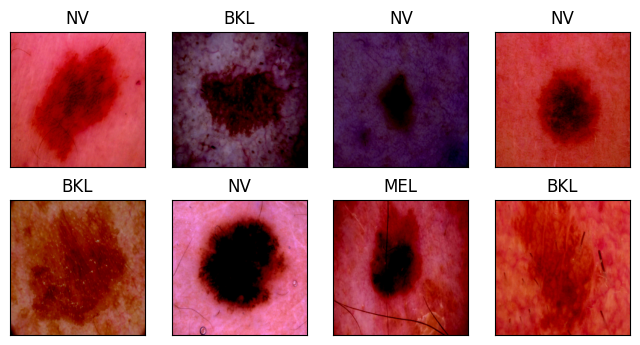

In [3]:
data = ISICDataModule(image_dir, label_file, batch_size, resize=(img_size, img_size))
train_loader = data.get_dataloader(train=True)
test_loader = data.get_dataloader(train=False)

batch = next(iter(train_loader))
data.visualize(batch, nrows=2, ncols=4)

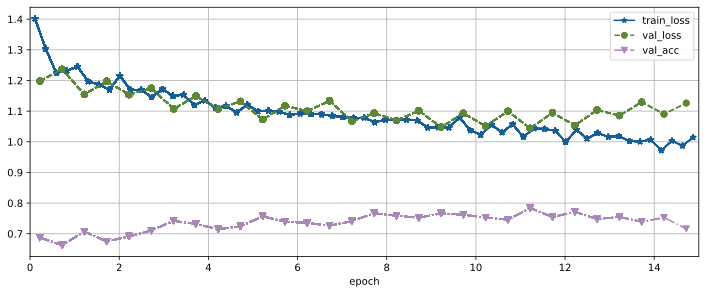

In [4]:
model = Instruction_ViT(img_size, patch_size, num_hiddens, mlp_num_hiddens, num_heads,
            num_blks, emb_dropout, blk_dropout, descriptions, lr, use_bias, num_classes)
trainer = u.Trainer(max_epochs, last_model_path, best_model_path, restart_train, gpu_idx)
trainer.fit(model, data)

In [5]:
trainer.print_training_his(max_epochs)

Epoch 1 : train loss 1.2903 val loss 1.2172 val acc 67.52%
Epoch 2 : train loss 1.1977 val loss 1.1759 val acc 69.09%
Epoch 3 : train loss 1.1698 val loss 1.1642 val acc 70.09%
Epoch 4 : train loss 1.1399 val loss 1.1282 val acc 73.71%
Epoch 5 : train loss 1.1148 val loss 1.1193 val acc 71.95%
Epoch 6 : train loss 1.0954 val loss 1.0952 val acc 74.82%
Epoch 7 : train loss 1.0923 val loss 1.1166 val acc 73.07%
Epoch 8 : train loss 1.0722 val loss 1.0801 val acc 75.40%
Epoch 9 : train loss 1.0634 val loss 1.0854 val acc 75.55%
Epoch 10: train loss 1.0540 val loss 1.0703 val acc 76.43%
Epoch 11: train loss 1.0404 val loss 1.0753 val acc 74.94%
Epoch 12: train loss 1.0317 val loss 1.0693 val acc 76.92%
Epoch 13: train loss 1.0232 val loss 1.0785 val acc 75.97%
Epoch 14: train loss 1.0076 val loss 1.1074 val acc 74.70%
Epoch 15: train loss 0.9926 val loss 1.1083 val acc 73.45%
*Best epoch 12: train loss 1.0317 val loss 1.0693 val acc 76.92%
